# Extended corner plot of GW170817

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import bilby
import pandas as pd
import numpy as np
import matplotlib.lines as mlines
import corner

In [11]:
# TaylorF2Ecck
result1 = bilby.result.read_in_result("../result_files/ecck.hdf5")
chirp_mass1 = result1.posterior["chirp_mass"].values
mass_ratio1 =  result1.posterior["mass_ratio"].values
e01 = result1.posterior["eccentricity"].values
theta_jn1 = result1.posterior["theta_jn"].values
D1 = result1.posterior["luminosity_distance"].values
ra1 = result1.posterior["ra"].values
dec1 = result1.posterior["dec"].values
m11 = (chirp_mass1*(1+mass_ratio1)**(1/5))/mass_ratio1**(3/5)
m21 = chirp_mass1*mass_ratio1**(2/5)*(1+mass_ratio1)**(1/5)
mtot1 = m11 + m21
eta1 = (m11*m21)/(mtot1**2)

In [12]:
# TaylorF2Ecc 3PN
result2 = bilby.result.read_in_result("../result_files/ecc3PNnospin.hdf5")
chirp_mass2 = result2.posterior["chirp_mass"].values
mass_ratio2 =  result2.posterior["mass_ratio"].values
e02 = result2.posterior["eccentricity"].values
theta_jn2 = result2.posterior["theta_jn"].values
D2 = result2.posterior["luminosity_distance"].values
ra2 = result2.posterior["ra"].values
dec2 = result2.posterior["dec"].values
m12 = (chirp_mass2*(1+mass_ratio2)**(1/5))/mass_ratio2**(3/5)
m22 = chirp_mass2*mass_ratio2**(2/5)*(1+mass_ratio2)**(1/5)
mtot2 = m12 + m22
eta2 = (m12*m22)/(mtot2**2)

In [13]:
# TaylorF2Ecc 3.5PN (no spin)
result3 = bilby.result.read_in_result("../result_files/ecc3p5nospin.hdf5")
chirp_mass3 = result3.posterior["chirp_mass"].values
mass_ratio3 =  result3.posterior["mass_ratio"].values
e03 = result3.posterior["eccentricity"].values
theta_jn3 = result3.posterior["theta_jn"].values
D3 = result3.posterior["luminosity_distance"].values
ra3 = result3.posterior["ra"].values
dec3 = result3.posterior["dec"].values
m13 = (chirp_mass3*(1+mass_ratio3)**(1/5))/mass_ratio3**(3/5)
m23 = chirp_mass3*mass_ratio3**(2/5)*(1+mass_ratio3)**(1/5)
mtot3 = m13 + m23
eta3 = (m13*m23)/(mtot3**2)

In [14]:
rng = np.random.default_rng(12345)
nsamples = np.min([len(chirp_mass1), len(chirp_mass2), len(chirp_mass3)])
data1 = np.transpose(np.array([chirp_mass1, mass_ratio1, mtot1, eta1, e01, D1, theta_jn1]))
df1 = pd.DataFrame(data1, columns=["chirp_mass", "mass_ratio", 'mtot', 'eta', "eccentricity", "luminosity_distance", "theta_jn"])
df1 = df1.sample(n=nsamples, random_state=rng)

data2 = np.transpose(np.array([chirp_mass2, mass_ratio2, mtot2, eta2, e02, D2, theta_jn2]))
df2 = pd.DataFrame(data2, columns=["chirp_mass", "mass_ratio", 'mtot', 'eta', "eccentricity", "luminosity_distance", "theta_jn"])
df2 = df2.sample(n=nsamples, random_state=rng)

data3 = np.transpose(np.array([chirp_mass3, mass_ratio3, mtot3, eta3, e03, D3, theta_jn3]))
df3 = pd.DataFrame(data3, columns=["chirp_mass", "mass_ratio", 'mtot', 'eta', "eccentricity", "luminosity_distance", "theta_jn"])
df3 = df3.sample(n=nsamples, random_state=rng)

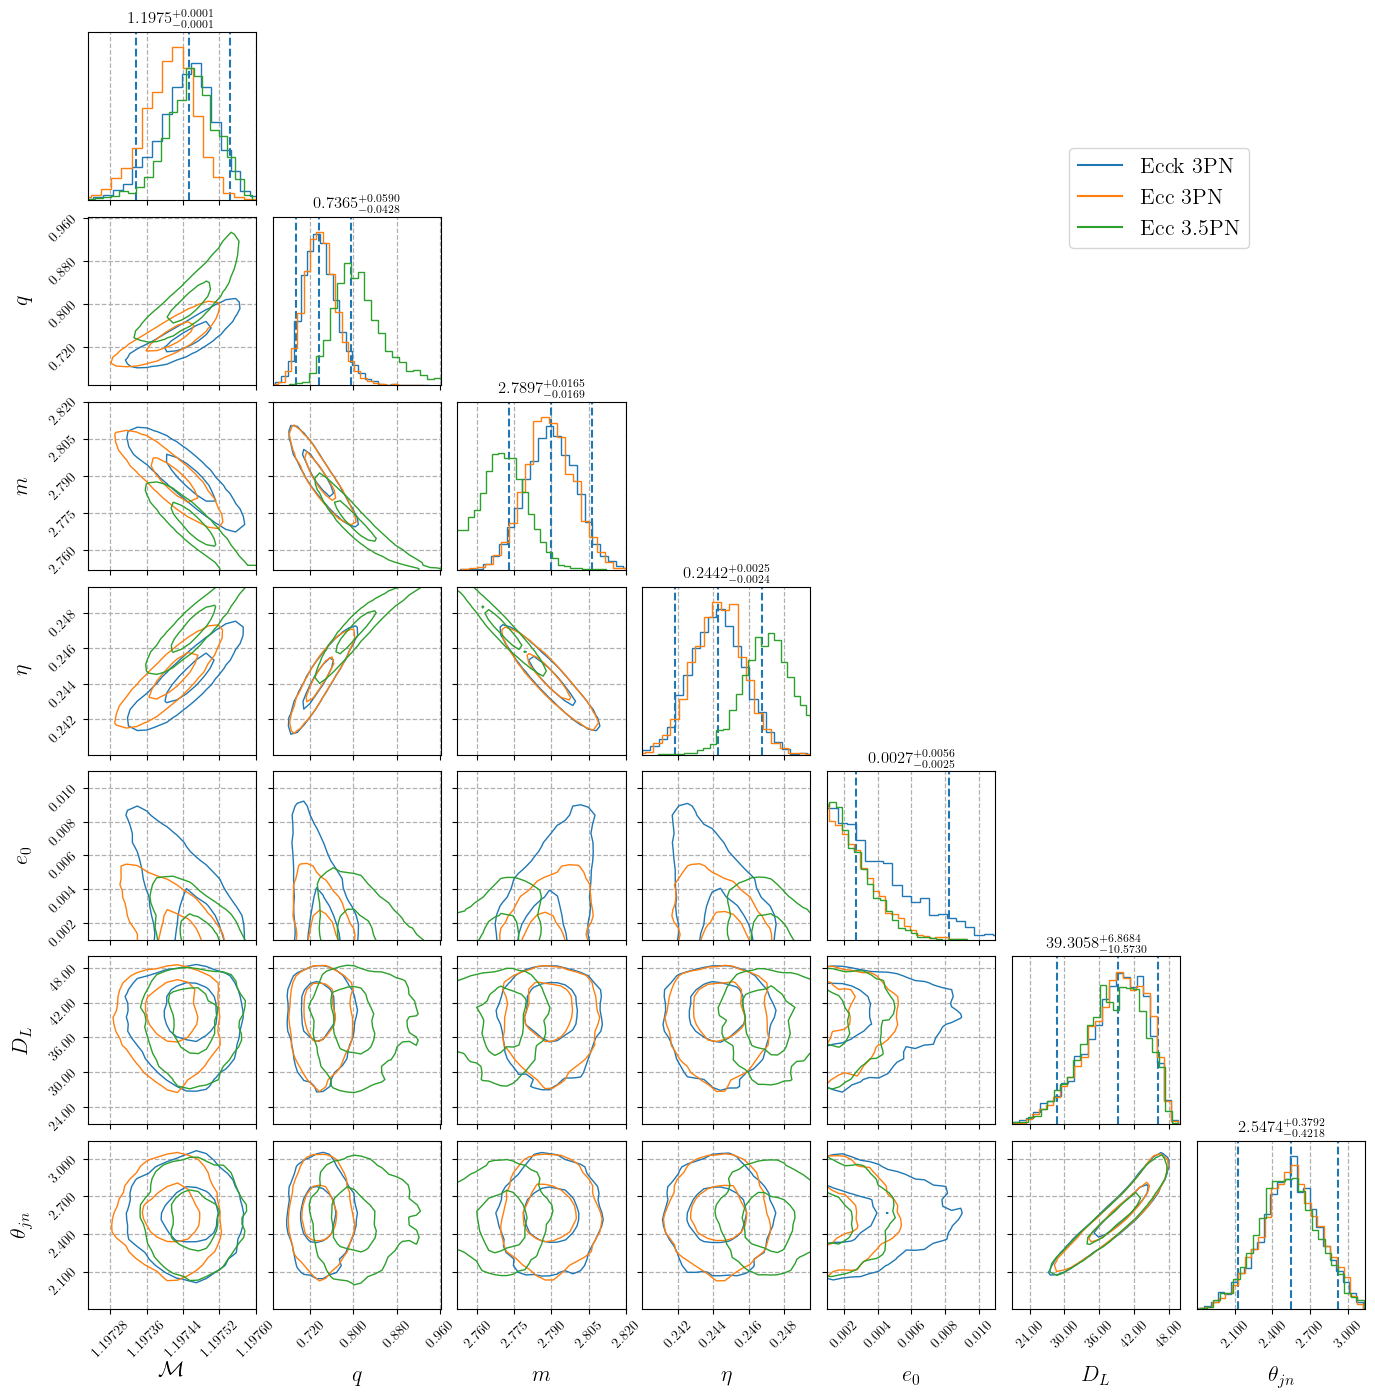

In [15]:
ndim = 7
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})
fig, axes = plt.subplots(ndim, ndim, figsize=(14, 14), gridspec_kw={"hspace": 0.1, "wspace": 0.1})

corner.corner(df1, fig=fig,color = 'C0', bins=25, smooth=0.8, plot_datapoints=False, plot_density=False, contourf_kwargs= dict(alpha=0.4), levels=(0.393,0.864), hist_kwargs={'linewidth': 1}, contour_kwargs={'linewidths': 1}, show_titles=True, quantiles=(0.05, 0.5, 0.95), title_fmt='.4f', title_kwargs={'fontsize': 12}, label_kwargs={'fontsize': 16})

corner.corner(df2, fig=fig, color='C1', bins=25, smooth=0.8, plot_datapoints=False, plot_density=False, contourf_kwargs= dict(alpha=0.4), levels=(0.393,0.864), hist_kwargs={'linewidth': 1}, contour_kwargs={'linewidths': 1},)

corner.corner(df3, fig=fig, color='C2', bins=25, smooth=0.8, plot_datapoints=False, plot_density=False, contourf_kwargs= dict(alpha=0.4), levels=(0.393,0.864), hist_kwargs={'linewidth': 1}, contour_kwargs={'linewidths': 1})

# x-axis tick labels
# Mc
axes[6, 0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '%.5f' % x))
axes[6,0].set_xlim(1.19723, 1.19760)
axes[5,0].set_xlim(1.19723, 1.19760)
axes[4,0].set_xlim(1.19723, 1.19760)
axes[3,0].set_xlim(1.19723, 1.19760)
axes[2,0].set_xlim(1.19723, 1.19760)
axes[1,0].set_xlim(1.19723, 1.19760)
axes[0,0].set_xlim(1.19723, 1.19760)
# q
axes[6, 1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '%.3f' % x))
axes[6,1].set_xlim(0.65, 0.962)
axes[5,1].set_xlim(0.65, 0.962)
axes[4,1].set_xlim(0.65, 0.962)
axes[3,1].set_xlim(0.65, 0.962)
axes[2,1].set_xlim(0.65, 0.962)
axes[1,1].set_xlim(0.65, 0.962)
# m
axes[6, 2].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '%.3f' % x))
axes[6,2].set_xlim(2.752, 2.820)
axes[5,2].set_xlim(2.752, 2.820)
axes[4,2].set_xlim(2.752, 2.820)
axes[3,2].set_xlim(2.752, 2.820)
axes[2,2].set_xlim(2.752, 2.820)
# eta
axes[6, 3].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '%.3f' % x))
axes[6,3].set_xlim(0.240, 0.2495)
axes[5,3].set_xlim(0.240, 0.2495)
axes[4,3].set_xlim(0.240, 0.2495)
axes[3,3].set_xlim(0.240, 0.2495)
axes[3,3].set_xlim(0.240, 0.2495)
# e0
axes[6, 4].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '%.3f' % x))
axes[6,4].set_xlim(0.001, 0.011)
axes[5,4].set_xlim(0.001, 0.011)
axes[4,4].set_xlim(0.001, 0.011)
axes[6, 5].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '%.2f' % x))
axes[6,5].set_xlim(21., 50.)
axes[5,5].set_xlim(21., 50.)
axes[6, 6].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '%.3f' % x))
axes[6,6].set_xlim(1.8, 3.14)

# y-axis tick labels
axes[6, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '%.3f' % y))
axes[6,0].set_ylim(1.8, 3.14)
axes[6,1].set_ylim(1.8, 3.14)
axes[6,2].set_ylim(1.8, 3.14)
axes[6,3].set_ylim(1.8, 3.14)
axes[6,4].set_ylim(1.8, 3.14)
axes[6,5].set_ylim(1.8, 3.14)
axes[5, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '%.2f' % y))
axes[5,0].set_ylim(21., 50.)
axes[5,1].set_ylim(21., 50.)
axes[5,2].set_ylim(21., 50.)
axes[5,3].set_ylim(21., 50.)
axes[5,4].set_ylim(21., 50.)
axes[4, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '%.3f' % y))
axes[4,0].set_ylim(0.001, 0.011)
axes[4,1].set_ylim(0.001, 0.011)
axes[4,2].set_ylim(0.001, 0.011)
axes[4,3].set_ylim(0.001, 0.011)
axes[3, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '%.3f' % y))
axes[3,0].set_ylim(0.240, 0.2495)
axes[3,1].set_ylim(0.240, 0.2495)
axes[3,2].set_ylim(0.240, 0.2495)
axes[2, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '%.3f' % y))
axes[2,0].set_ylim(2.752, 2.820)
axes[2,1].set_ylim(2.752, 2.820)
axes[1, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '%.3f' % y))
axes[1,0].set_ylim(0.65, 0.962)

# x-axis labels
size_axis_label = 16
axes[6,0].set_xlabel(r'$\mathcal{M}$', labelpad=2, fontsize=size_axis_label)
axes[6,1].set_xlabel(r'$q$', labelpad=11, fontsize=size_axis_label)
axes[6,2].set_xlabel(r'$m$', labelpad=11, fontsize=size_axis_label)
axes[6,3].set_xlabel(r'$\eta$', labelpad=11, fontsize=size_axis_label)
axes[6,4].set_xlabel(r'$e_0$', labelpad=11, fontsize=size_axis_label)
axes[6,5].set_xlabel(r'$D_L$', labelpad=11, fontsize=size_axis_label)
axes[6,6].set_xlabel(r'$\theta_{jn}$', labelpad=11, fontsize=size_axis_label)
# y-axis labels
axes[6, 0].set_ylabel(r'$\theta_{jn}$', labelpad=11, fontsize=size_axis_label)
axes[5, 0].set_ylabel(r'$D_L$', labelpad=11, fontsize=size_axis_label)
axes[4, 0].set_ylabel(r'$e_0$', labelpad=11, fontsize=size_axis_label)
axes[3, 0].set_ylabel(r'$\eta$', labelpad=11, fontsize=size_axis_label)
axes[2, 0].set_ylabel(r'$m$', labelpad=11, fontsize=size_axis_label)
axes[1, 0].set_ylabel(r'$q$', labelpad=11, fontsize=size_axis_label)

# grid lines
for ax in axes.flatten():
    ax.grid(True, linestyle='--', linewidth=0.9)

# add legend with line colors
blue_line = mlines.Line2D([], [], color='C0', label='Ecck 3PN')
orange_line = mlines.Line2D([], [], color='C1', label='Ecc 3PN')
green_line = mlines.Line2D([], [], color='C2', label='Ecc 3.5PN')
handles = [blue_line, orange_line, green_line]
labels = [h.get_label() for h in handles] 
fig.legend(handles=handles, labels=labels, bbox_to_anchor=(0., 0.9, 0.9, .0), ncol=1, fontsize=16)

plt.savefig("fullpe_gw170817.pdf", bbox_inches="tight", dpi=300)
plt.show()